# Análise de Visualização de Comércio Eletrônico (Ecommerce)
- Para essa última etapa do projeto, criei algumas visualizações interessantes para nossos dados: 
  - **Gráfico de Dispersão**: Nota x Desconto e Preço
  - **Mapa de Calor**: Correlação entre variáveis numéricas
  - **Mapa de Barras**: Produtos por Gênero 
  - **Mapa de Pizza**: Produtos por Temporada
  - **Mapa de Densidade**: Densidade de Desconto

## 1.0 Bibliotecas e Leitura de Dados 📋

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [2]:
# Leitura de base de dados tratados
df = pd.read_csv('ecommerce_preparados.csv')
df.head()

,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,Review2,...,Preço,Marca_Cod,Material_Cod,Temporada_Cod,Marca_Freq,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Material_Freq
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,0.0,Toronto Uniformes Profissionais,Poliéster,Sem Gênero,Não Definido,"Preço justo , bem feito acabamento ok. Única s...","Tamanho bom, costuras de qualidade, porém teci...",...,69.90,781,122,1,0.002274,0.629630,0.030076,0.000000,0.100645,0.125922
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,Lupo,Algodão,Masculino,Outono/Inverno,As cuecas são boas; porém você percebe na cost...,"Pelo preço promocional, com ctz tem algum defe...",...,232.89,463,25,3,0.042292,0.814815,0.334251,0.272727,0.378585,0.182076
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,4.7,5682.0,20.0,Zorba,Algodão,Masculino,Não Definido,O tecido é bom e são confortáveis. Só que a nu...,Vendo comentários de outros consumidores vejo ...,...,199.90,838,25,1,0.009095,0.888889,0.625978,0.303030,0.322329,0.182076
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,4.6,1700.0,22.0,Mash,Algodão,Masculino,Primavera/Verão,"As cuecas são boas, porém meu marido usa g e p...","E o tamanho certo, mas em baixo dela, fica mui...",...,229.39,494,25,7,0.010914,0.851852,0.187287,0.333333,0.372617,0.182076
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,4.4,507.0,9.0,Menina Linda,Jean,Feminino,Primavera/Verão,Estou encantada com essas peças!.\nOs shorts s...,"Recomendo, tecido confortável, igual a foto.",...,129.20,509,74,7,0.010005,0.777778,0.055855,0.136364,0.201767,0.021554


## 2.0 Satisfação dos Clientes

- A partir desse gráfico, podemos notar que a concentração das avaliações estão entre as notas de 5.0 e 4.0. Essas notas são de compras que quase não tiveram desconto e, também, são produtos com preços mais elevados.
- Com isso, observamos que ter ou não desconto não é um fator muito relevante para a qualidade das avaliações (mesmo que alguns produtos tenham algum desconto). Também é possível notar que quanto maior o preço do produto, maior a possibilidade dele ter uma avaliação condizente, pois apresenta maior concentração na área esquerda superior.

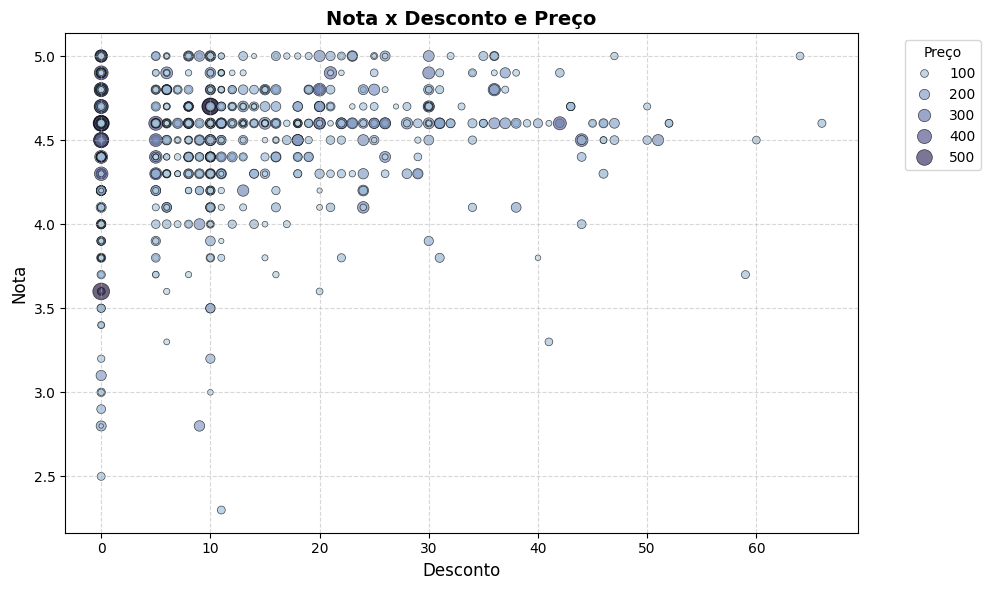

In [3]:
# Adicionando uma figura + gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, 
                y='Nota', 
                x='Desconto', 
                size='Preço', 
                hue='Preço', 
                palette='ch:s=.25,rot=-.25', 
                sizes=(10, 150),
                alpha=0.7,
                edgecolor='black',
                linewidth=0.5
                )
# Adicionando legendas, eixos e título
plt.legend(title="Preço", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Nota x Desconto e Preço', fontsize=14, weight='bold')
plt.xlabel('Desconto', fontsize=12)
plt.ylabel('Nota', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrando Gráfico
plt.show()

## 3.0 Correlação de Variáveis
- A partir desse gráfico, é possível notar a correlação das seguintes variáveis:
    - **Qtd_Vendidos x N_Avaliações**: Com uma correlação alta, podemos perceber que o número de avaliações está diretamente ligado com a quantidade de produtos vendidos. Ou seja, quanto mais produtos forem vendidos naquele anúncio, a tendência é que haja mais avaliações também;
    - **Desconto x N_Avaliações**: Mesmo não sendo uma correlação tão forte quanto a primeira, essa correlação existe. Podemos verificar que se o produto possui algum desconto, isso impacta no número de avaliações;
    - **Qtd_Vendidos x Desconto**: Também é uma correlação baixa, porém existente. É possível perceber que se um produto possui desconto, sua quantidade vendida também tende a ser maior;
    - **Marca_Freq x Temporada_Cod**: A frequência da marca tem correlação com o código da temporada, mesmo que levemente. A tendência é que a frequência da marca vai ser um pouco relativa a temporada que esta se encontra.

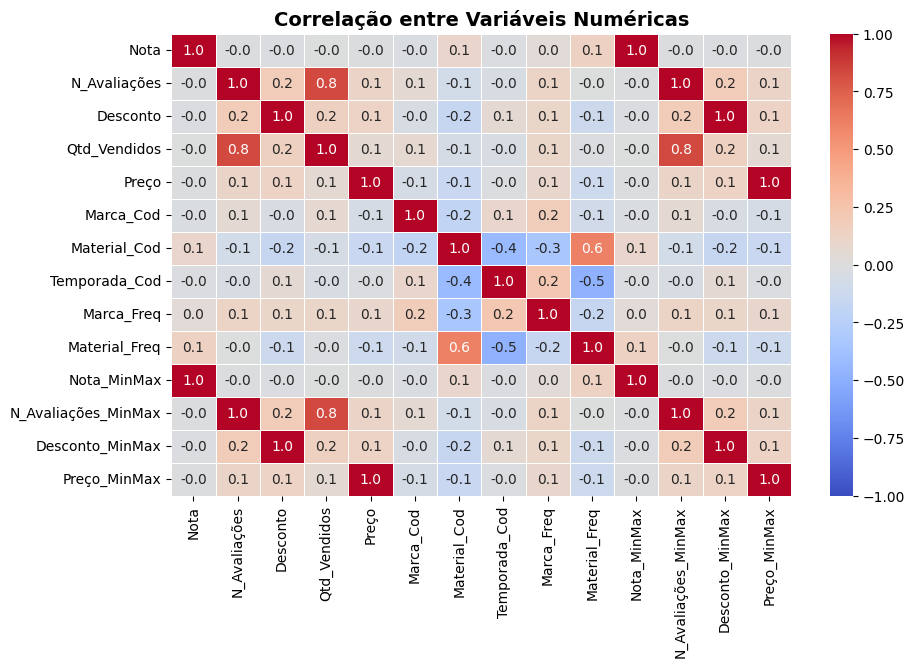

In [4]:
# Resgatando variáveis para o gráfico
df_heatmap = df[
    ['Nota',
    'N_Avaliações',
    'Desconto',
    'Qtd_Vendidos',
    'Preço',
    'Marca_Cod',
    'Material_Cod',
    'Temporada_Cod',
    'Marca_Freq',
    'Material_Freq',
    'Nota_MinMax',
    'N_Avaliações_MinMax',
    'Desconto_MinMax',
    'Preço_MinMax']
    ].corr()

# Adicionando figura e gráfico
plt.figure(figsize=(10,6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt='.1f', vmin=-1, vmax=1, linewidths=0.5)

# Adicionando um título
plt.title('Correlação entre Variáveis Numéricas', fontsize=14, weight='bold')

# Exibindo gráfico
plt.show()

## 4.0 Quantidade de Produtos por Gênero 
- Neste gráfico, é possível notar que a concentração de produtos são dos gêneros: Feminino, Masculino, Bebês, Sem Gênero, Meninas, Meninos e Sem Gênero Infantil; nesta ordem. As demais categorias são bem inferiores as demais e chegam bem próximas da linha 0.

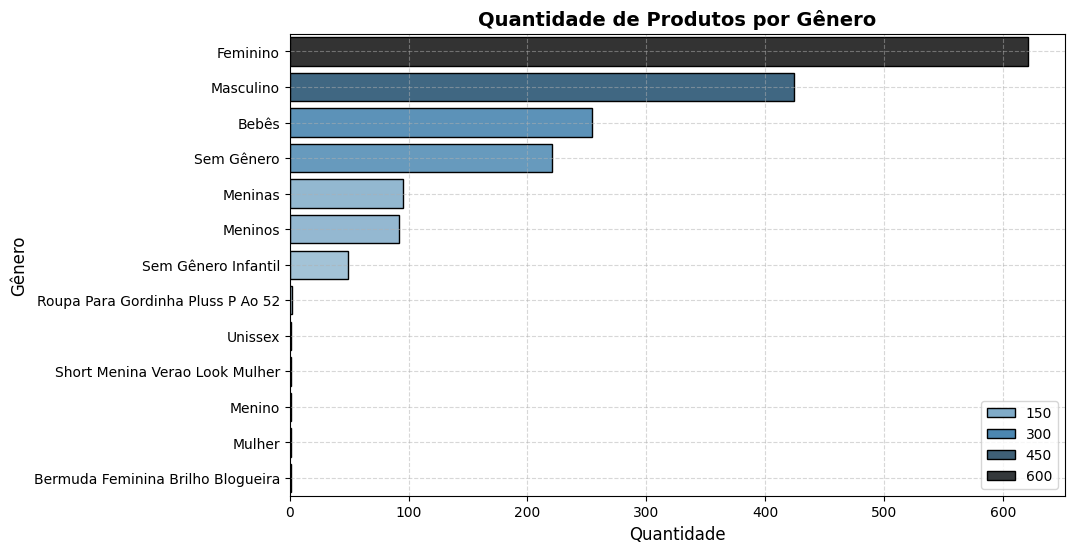

In [5]:
# Regatando eixo desejado
x = df['Gênero'].value_counts()

# Adicionando figura + gráfico
plt.figure(figsize=(10,6))
sns.barplot(y=x.index, x=x.values, palette="Blues_d", edgecolor='black', hue=x.values)

# Adiciondo título, eixos e legenda
plt.title('Quantidade de Produtos por Gênero', fontsize=14, weight='bold')
plt.ylabel('Gênero', fontsize=12)
plt.xlabel('Quantidade', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

# Exibindo Gráfico
plt.show()


## 5.0 Produtos por Temporada 
- Neste gráfico, é possível notar que a concentração de produtos são das temporadas: Primavera/Verão, Outono/Inverno e Primavera/Verão e Outono/Inverno, nessa ordem;
- OBS: As categorias precisavam ser tratadas, pois havia diferenças em um mesmo dado, que foram substituídas por “Primavera-Verão e Outono-Inverno”.

In [6]:
# Ajustando categorias de 'Temporada'
temporada = {
    'Não Definido': 'Não Definido', 
    'Outono/Inverno': 'Outono/Inverno', 
    'Primavera/Verão': 'Primavera/Verão',
    'Primavera-Verão Outono-Inverno': 'Primavera-Verão e Outono-Inverno',
    '2021': '2021', 
    'Outono-Inverno': 'Outono/Inverno',
    'Primavera-Verão - Outono-Inverno': 'Primavera-Verão e Outono-Inverno',
    'Primavera/Verão/Outono/Inverno': 'Primavera-Verão e Outono-Inverno', 
    'Primavera/Verão Outono/Inverno': 'Primavera-Verão e Outono-Inverno',
    'Primavera-Verão': 'Primavera/Verão'
}
df['Temporada'] = df['Temporada'].str.strip().map(temporada)

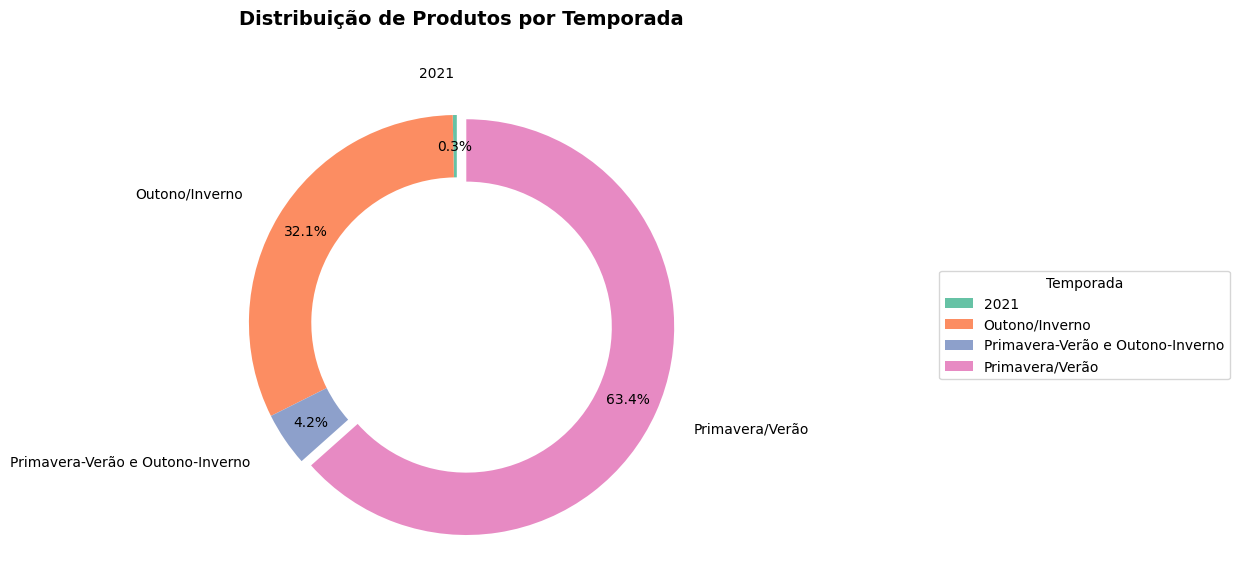

In [7]:
# Criando df com a temporada diferente de 'Não Definido'
df_temporada = df[df['Temporada'] != 'Não Definido']

# Adicionando eixos desejados 
temporada_count = df_temporada['Temporada'].value_counts().sort_index()  # Contar e ordenar as notas
labels = temporada_count.index 
sizes = temporada_count.values  

# Adicionando paleta de cores seaborn
paleta_cores = sns.color_palette("Set2")

# Criando o gráfico de pizza 
plt.figure(figsize=(10, 6))
explode = [0.05 if size == max(sizes) else 0 for size in sizes]  # Explodir a maior fatia

wedges, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',  # Percentual com uma casa decimal
    startangle=90,
    pctdistance=0.85,  # Distância dos percentuais em relação ao centro
    labeldistance=1.2,  # Distância das labels
    colors=paleta_cores,  # Paleta de cores 
    wedgeprops=dict(width=0.3)  # Fatias mais finas
)

# Adicionando uma legenda externa com posição ajustada
plt.legend(wedges, labels, title="Temporada", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

# Adicionando título com mais espaçamento
plt.title('Distribuição de Produtos por Temporada', pad=50, fontsize=14, weight='bold')

# Garantindo que o gráfico seja circular
plt.axis('equal')

# Exibindo o gráfico
plt.show()

## 6.0 Densidade de Desconto
- Nesse gráfico, é possível notar que maioria dos produtos não possuem desconto, fazendo um pico bem alto no 0. A segunda concentração de descontos está em 10%, diminuindo ainda mais a partir dos 20% até 30% para, depois, existir pouquíssimos produtos com desconto entre 40-70%;
- Isso nos mostra que realmente existem diversos produtos que não possuem desconto, ou seu desconto está concentrado nos 10-20%.


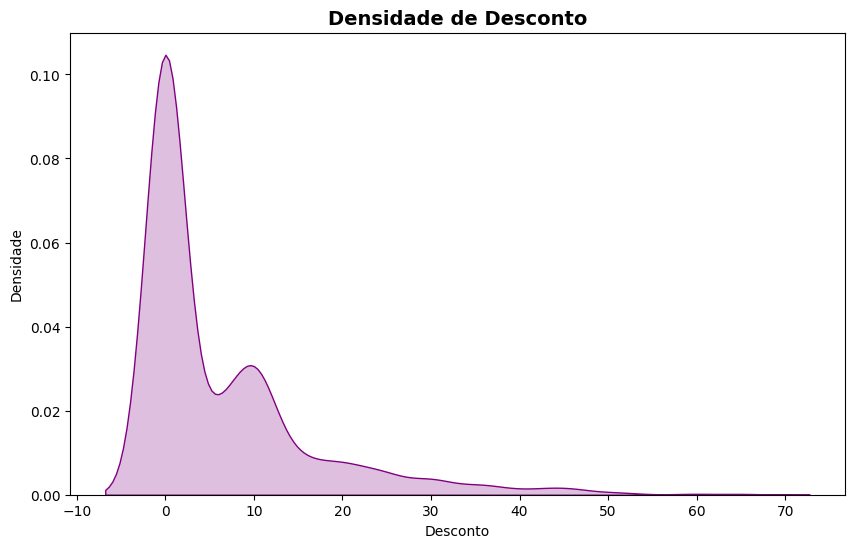

In [10]:
# Criando o gráfico de densidade para a variável 'Qtd_Vendidos'
plt.figure(figsize=(10,6))
sns.kdeplot(df['Desconto'], fill=True, color='purple')

# Ajustes estéticos
plt.title('Densidade de Desconto', fontsize=14, weight='bold')
plt.xlabel('Desconto')
plt.ylabel('Densidade')

# Exibindo o gráfico
plt.show()